In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Import data
retail = pd.read_csv('online_retail2.csv').drop_duplicates(ignore_index=True).dropna(axis=0, how='any')
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1033035
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [3]:
# Process data
retail['Revenue'] = retail['Quantity'] * retail['Price']
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['date'] = retail['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail['date'] = pd.to_datetime(retail['date'])
retail['month'] = retail['date'].dt.month
retail['year'] = retail['date'].dt.year
retail['week'] = retail['date'].dt.isocalendar().week

# Convert the data to get the sum of revenue by week, month, year
time_series = retail.groupby(by = ['week', 'month', 'year']).agg(date = ('date', 'first'), total_revenue = ('Revenue', 'sum')).sort_values('date', ascending = True).reset_index()
time_series.head()

,week,month,year,date,total_revenue
0,49,12,2009,2009-12-01,223854.39
1,50,12,2009,2009-12-07,198587.36
2,51,12,2009,2009-12-14,204375.18
3,52,12,2009,2009-12-21,33308.17
4,1,1,2010,2010-01-04,165537.86


In [4]:
# Create trend column and convert month to category
time_series['trend'] = pd.DataFrame(np.arange(1, len(time_series)+1, 1))
time_series['month'] = time_series['month'].astype('category')
time_series

,week,month,year,date,total_revenue,trend
0,49,12,2009,2009-12-01,223854.39,1
1,50,12,2009,2009-12-07,198587.36,2
2,51,12,2009,2009-12-14,204375.18,3
3,52,12,2009,2009-12-21,33308.17,4
4,1,1,2010,2010-01-04,165537.86,5
...,...,...,...,...,...,...
116,46,11,2011,2011-11-14,270609.59,117
117,47,11,2011,2011-11-21,241503.48,118
118,48,11,2011,2011-11-28,138609.29,119
119,48,12,2011,2011-12-01,107758.81,120


In [5]:
# Training features
X = time_series.drop(['week', 'year', 'date', 'total_revenue'], axis = 1)

# One-hot enconding
names = pd.get_dummies(X).columns # feature name
X = pd.get_dummies(X).values # feature value
X

array([[1, False, False, ..., False, False, True],
       [2, False, False, ..., False, False, True],
       [3, False, False, ..., False, False, True],
       ...,
       [119, False, False, ..., False, True, False],
       [120, False, False, ..., False, False, True],
       [121, False, False, ..., False, False, True]],
      shape=(121, 13), dtype=object)

In [6]:
# Output
Y = time_series['total_revenue'].values
Y

array([223854.39 , 198587.36 , 204375.18 ,  33308.17 , 165537.86 ,
       121072.49 , 114059.491, 129766.671, 109147.842,  78704.03 ,
       150788.132, 148956.422, 149580.8  , 116763.19 , 140103.221,
       138442.3  ,  88529.8  ,  28071.05 , 123036.   , 126127.681,
       124328.91 , 156444.191,  12288.17 , 143322.14 , 132965.9  ,
       133924.18 , 135373.   ,  88968.4  , 185604.69 ,  90814.67 ,
       101063.58 , 102333.21 ,  55311.6  , 128764.22 , 135436.46 ,
       130952.04 , 110421.01 ,  30338.16 , 113638.72 , 135888.84 ,
       153254.74 , 131683.83 ,  20455.17 ,  97776.41 , 116944.46 ,
       140397.261, 216041.05 , 207360.87 ,  71878.93 , 210853.66 ,
       284225.81 , 210897.96 , 183664.38 , 254592.31 , 271912.761,
       257988.361, 236138.51 , 108393.22 , 145047.39 , 207271.98 ,
       156572.76 ,  43480.73 , 108741.64 , 152005.52 ,  96611.01 ,
        98843.01 ,  17530.72 ,  86128.74 ,  83066.97 , 124527.48 ,
       126786.15 ,  15024.73 , 100090.3  , 107241.46 , 134992.

In [7]:
# Fit model
model = LinearRegression()
model.fit(X, Y)

# Model result
print(model.get_params())
print(model.intercept_)
print(model.coef_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
139594.52163078083
[-8.84748114e+01 -2.45697360e+04 -3.31708970e+04 -1.44136030e+04
 -3.68477308e+04 -2.49279771e+04 -1.66770885e+04 -2.03996564e+04
 -2.44566390e+04  3.79171923e+04  4.37307371e+04  9.36425728e+04
  2.01728256e+04]


In [8]:
dict1 = list(zip(names, model.coef_))
dict1

[('trend', np.float64(-88.4748114385926)),
 ('month_1', np.float64(-24569.735984675746)),
 ('month_2', np.float64(-33170.8969547888)),
 ('month_3', np.float64(-14413.603016044197)),
 ('month_4', np.float64(-36847.730758851176)),
 ('month_5', np.float64(-24927.977112796976)),
 ('month_6', np.float64(-16677.08853874596)),
 ('month_7', np.float64(-20399.656381552995)),
 ('month_8', np.float64(-24456.63899841109)),
 ('month_9', np.float64(37917.19233855224)),
 ('month_10', np.float64(43730.73707551543)),
 ('month_11', np.float64(93642.57275865746)),
 ('month_12', np.float64(20172.82557314184))]

<Axes: xlabel='date', ylabel='total_revenue'>

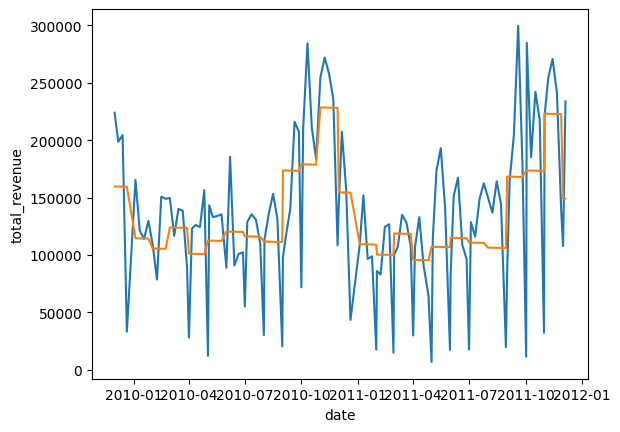

In [9]:
# Run the prediction for historical data
prediction = model.predict(X)
time_series['prediction'] = prediction
sns.lineplot(data = time_series, x = time_series['date'], y = time_series['total_revenue'])
sns.lineplot(data = time_series, x = time_series['date'], y = time_series['prediction'])

In [10]:
# Predict the future

# Create forecasting horizon
max_date = time_series['date'].max()
dates = pd.DataFrame({'date': pd.date_range(start = max_date, end = '2012-02-05', freq = 'W')})
dates

,date
0,2011-12-11
1,2011-12-18
2,2011-12-25
3,2012-01-01
4,2012-01-08
5,2012-01-15
6,2012-01-22
7,2012-01-29
8,2012-02-05


In [11]:
# Concat the date into time series
time_series = pd.concat([time_series, dates], axis = 0).reset_index()
time_series

,index,week,month,year,date,total_revenue,trend,prediction
0,0,49,12,2009.0,2009-12-01,223854.39,1.0,159678.872392
1,1,50,12,2009.0,2009-12-07,198587.36,2.0,159590.397581
2,2,51,12,2009.0,2009-12-14,204375.18,3.0,159501.922770
3,3,52,12,2009.0,2009-12-21,33308.17,4.0,159413.447958
4,4,1,1,2010.0,2010-01-04,165537.86,5.0,114582.411589
...,...,...,...,...,...,...,...,...
125,4,<NA>,NaN,NaN,2012-01-08,NaN,NaN,NaN
126,5,<NA>,NaN,NaN,2012-01-15,NaN,NaN,NaN
127,6,<NA>,NaN,NaN,2012-01-22,NaN,NaN,NaN
128,7,<NA>,NaN,NaN,2012-01-29,NaN,NaN,NaN


In [12]:
# Process the data
time_series['trend'] = pd.DataFrame(np.arange(1, len(time_series)+1, 1))
time_series['month'] = time_series['date'].dt.month
time_series['month'] = time_series['month'].astype('category')
time_series

,index,week,month,year,date,total_revenue,trend,prediction
0,0,49,12,2009.0,2009-12-01,223854.39,1,159678.872392
1,1,50,12,2009.0,2009-12-07,198587.36,2,159590.397581
2,2,51,12,2009.0,2009-12-14,204375.18,3,159501.922770
3,3,52,12,2009.0,2009-12-21,33308.17,4,159413.447958
4,4,1,1,2010.0,2010-01-04,165537.86,5,114582.411589
...,...,...,...,...,...,...,...,...
125,4,<NA>,1,NaN,2012-01-08,NaN,126,NaN
126,5,<NA>,1,NaN,2012-01-15,NaN,127,NaN
127,6,<NA>,1,NaN,2012-01-22,NaN,128,NaN
128,7,<NA>,1,NaN,2012-01-29,NaN,129,NaN


<Axes: xlabel='date', ylabel='total_revenue'>

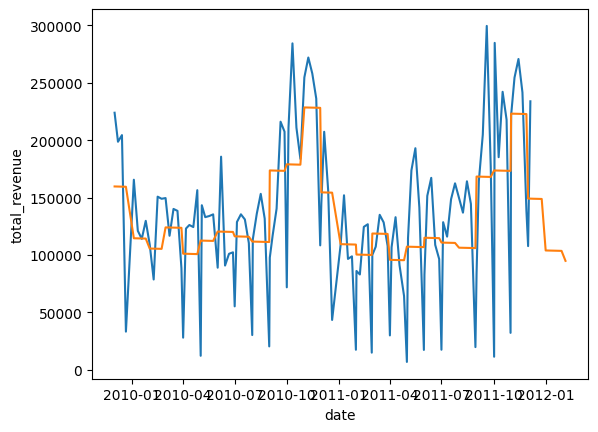

In [13]:
# Prepare the input and output
X = time_series.drop(['index', 'week', 'year', 'date', 'total_revenue', 'prediction'], axis = 1)
names = pd.get_dummies(X).columns
X = pd.get_dummies(X).values
Y = time_series['total_revenue'].values

# Run the prediction
prediction = model.predict(X)
time_series['prediction'] = prediction
sns.lineplot(data = time_series, x = time_series['date'], y = time_series['total_revenue'])
sns.lineplot(data = time_series, x = time_series['date'], y = time_series['prediction'])